In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('Financials.csv')

In [ ]:
# Basic Information
print("\n-- Basic informaion")
print(df.info())

print("\n -- First 5 rows")
print(df.head())

print("\n-- missing values")
print(df.isnull().sum())

print("\n -- Summary Statistics")
print(df.describe(include="all"))


-- Basic informaion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Ye

In [ ]:
import pandas as pd

# Load your original dataset
df = pd.read_csv("Financials.csv")

# --- Cleaning ---
# Strip column names
df.columns = df.columns.str.strip()

# List of money columns
money_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price',
              'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Function to clean currency values
def clean_currency(x):
    if isinstance(x, str):
        x = x.replace("$", "").replace(",", "").strip()
        if x in ["-", ""]:
            return 0
        if "(" in x and ")" in x:  # handle negatives
            x = "-" + x.replace("(", "").replace(")", "")
        return float(x)
    return x

# Apply to money columns
for col in money_cols:
    df[col] = df[col].apply(clean_currency)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Save cleaned dataset
df.to_csv("Financials_Cleaned.csv", index=False)



/tmp/ipython-input-3784006593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


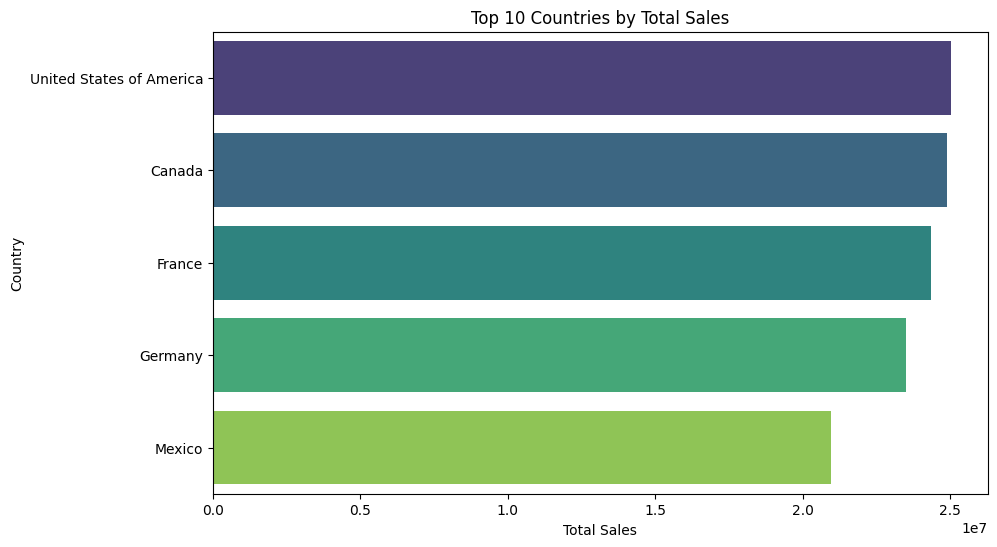

In [ ]:
# 1. Top 10 Countries by Sales
top_countries = df.groupby("Country")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

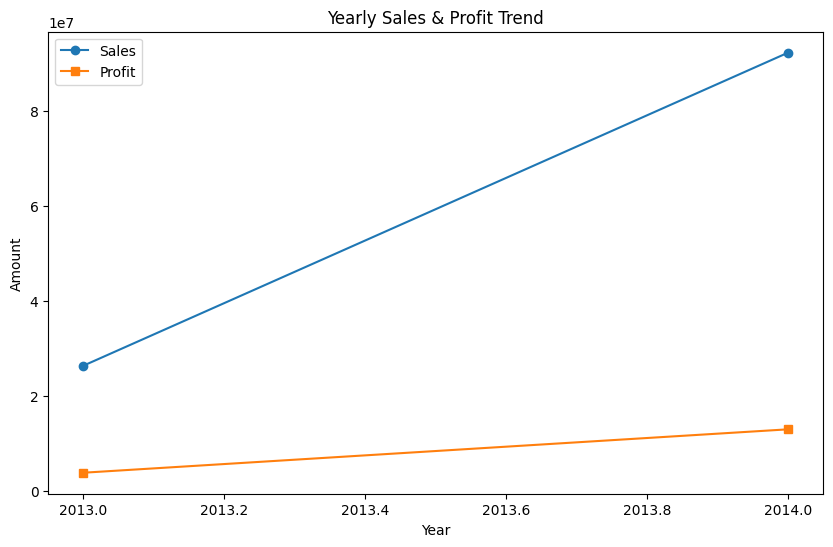

In [ ]:
# 2. Yearly Sales & Profit Trend
yearly = df.groupby("Year")[["Sales", "Profit"]].sum()
plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly["Sales"], marker="o", label="Sales")
plt.plot(yearly.index, yearly["Profit"], marker="s", label="Profit")
plt.title("Yearly Sales & Profit Trend")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.show()

/tmp/ipython-input-3969460332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Segment", y="Profit", palette="Set2")


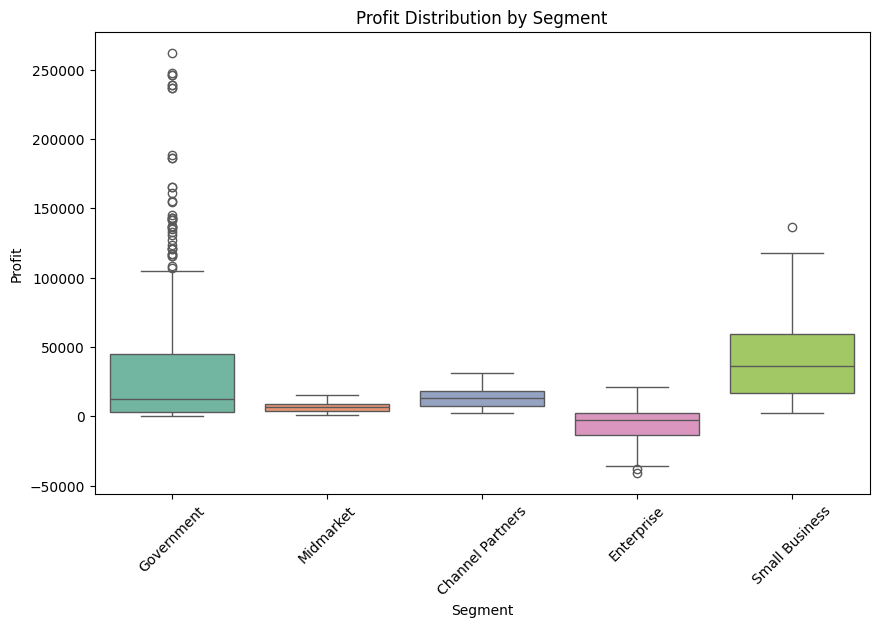

In [ ]:
# 3. Profit Distribution by Segment (Boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Segment", y="Profit", palette="Set2")
plt.title("Profit Distribution by Segment")
plt.xticks(rotation=45)
plt.show()


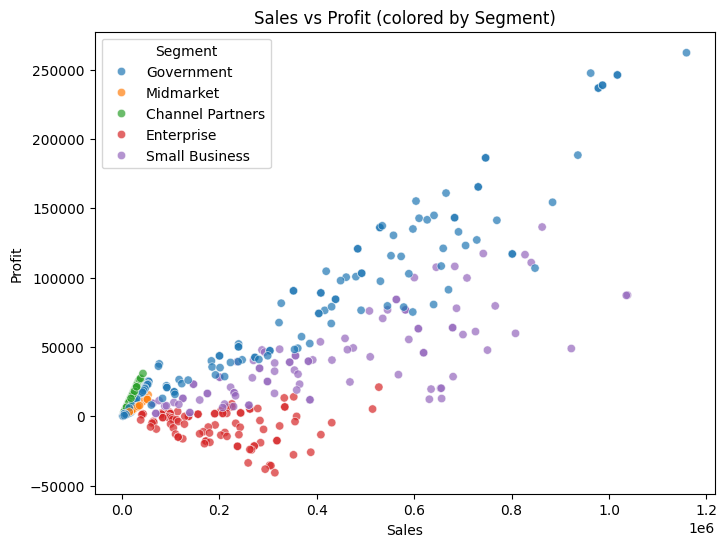

In [ ]:
# 4. Sales vs Profit Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Segment", alpha=0.7)
plt.title("Sales vs Profit (colored by Segment)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()